In [98]:
# Setup Imports
import numpy as np
import matplotlib.pyplot as plt

# Loading Results from OL1.py Application outputs
results = [{
        "title":"WDBC - UnStandardized",
        "limits": [0.5, 1.0],
        "adam": np.loadtxt("wdbc-unstandardized-adam-results.txt"),
        "rmsprop": np.loadtxt("wdbc-unstandardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("wdbc-unstandardized-sgd-results.txt"),
    },{
        "title":"WDBC - Standardized",
        "limits": [0.5, 1.0],
        "adam": np.loadtxt("wdbc-standardized-adam-results.txt"),
        "rmsprop": np.loadtxt("wdbc-standardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("wdbc-standardized-sgd-results.txt"),
    },{
        "title":"IRIS - UnStandardized",
        "limits": [0.2, 1.0],
        "adam": np.loadtxt("iris-unstandardized-adam-results.txt"),
        "rmsprop": np.loadtxt("iris-unstandardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("iris-unstandardized-sgd-results.txt"),
    },{
        "title":"IRIS - Standardized",
        "limits": [0.2, 1.0], # On IRS
        "adam": np.loadtxt("iris-standardized-adam-results.txt"),
        "rmsprop": np.loadtxt("iris-standardized-rmsprop-results.txt"),
        "sgd": np.loadtxt("iris-standardized-sgd-results.txt"),
    }]


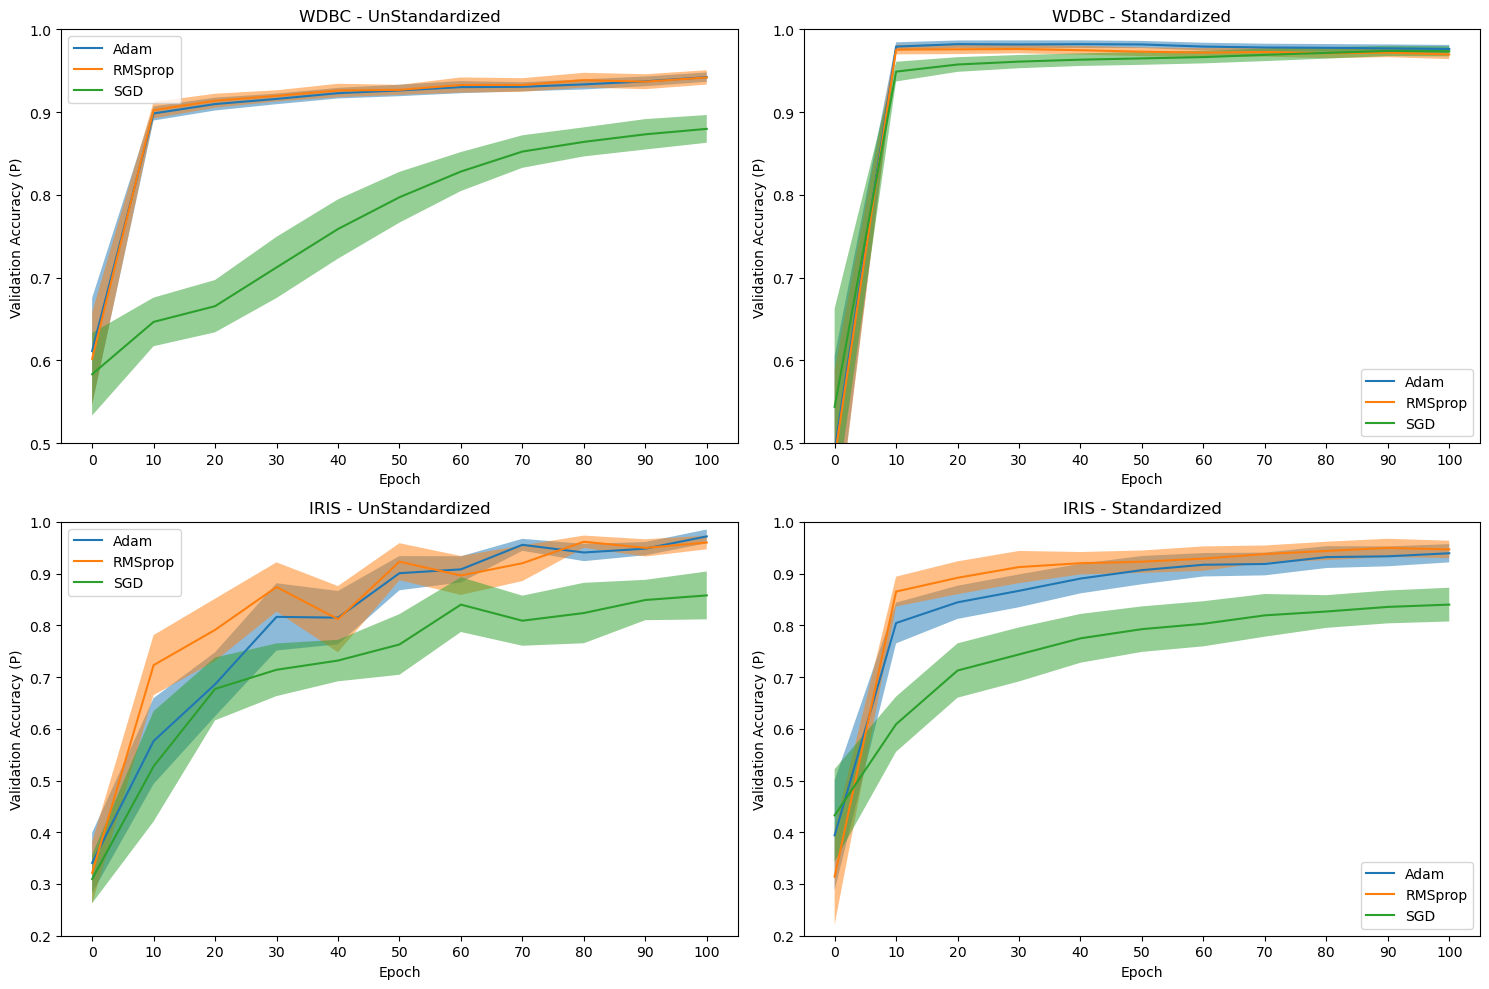

In [99]:

# Create a 2x2 grid for the Plots (subplots)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Default Values for all Plots
for i, axis in enumerate(axes.ravel()):

    # Setup Data Layers for Plots
    axis.set_title(results[i]["title"])

    # Setup Adam - Optimized
    data = results[i]["adam"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='Adam')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup RMSprop - Optimized
    data = results[i]["rmsprop"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='RMSprop')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # Setup SGD - Optimized
    data = results[i]["sgd"]
    axis.plot(np.arange(0, data.shape[1]), np.mean(data, 0),label='SGD')
    axis.fill_between(np.arange(0, data.shape[1]), np.mean(data, 0)-(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), np.mean(data, 0)+(1.96*np.std(data, 0)/np.sqrt(data.shape[0])), alpha=0.5)

    # General Setting and UI configs that are the same on each Plot
    axis.set_ylabel('Validation Accuracy (P)')
    axis.set_ylim(results[i]["limits"])
    axis.set_xlabel('Epoch')
    axis.set_xticks(ticks=np.arange(0, 11), labels=np.arange(0, 110, 10))
    axis.legend() 

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()